## 1 Lista de librerias

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from unidecode import unidecode
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2 Funciones

In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/Tesis_Functions.ipynb'

balancear_datos Loaded
Selectkbest_features Loaded
rfe_features Loaded
Integración de Variables Loaded
evaluacion de los modelos Loaded
Pca_components Loaded
Improtancia con XGBoost y Random forest Loaded
Random Forest Loaded
quitar_tildes Loaded
completar_datos_serie_tiempo Loaded
eliminar_filas_nan Loaded
cambiar_numeros_menores Loaded
normalize_variables Loaded
calcular_crecimiento_ingresos Loaded
obtener_variables_correlacionadas Loaded
generar_componentes_principales Loaded
rfe_with_elasticnet Loaded
calcular_crecimiento_promedio_por_categoria_Predial Loaded
categorizar_por_boxplot Loaded
calcular_crecimiento_promedio_por_categoria Loaded
limitar_atipicos Loaded
crear_dummies Loaded


## 3 Cargar Datos Clasificación

In [ ]:
#Lista de municipios (Regresión: ok; Clasifficación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1a9IfZDuiqbhh2iefH8BMarHL8IXWpayF'
df = pd.read_csv(archivo_csv, sep=';', encoding='latin-1')
Municipios = pd.read_csv(archivo_csv, sep=';', encoding='latin-1')

In [ ]:
#Impuesto predial por municipio (Regresión: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=15tKplCTM0AV7HS5tTBaaQdWBPBm3sX5J'
Predial_Final = pd.read_csv(archivo_csv, sep=';',thousands=',', decimal='.')
Predial_Final['Fecha']=pd.to_datetime(Predial_Final['Year'], format='%Y')
#quita atipicos con boxplot
Predial_Final_sin_atipicos=normalizar_serie_tiempo_por_categoria(Predial_Final, 'Fecha', 'Municipio', 'Predial')
Predial_Final_sin_atipicos['Predial'] = Predial_Final_sin_atipicos['Predial'].replace(0, np.nan)

#Generar los ajustes de la variables de valroes sin atipicos

#funcion de ajuste de valores sin atipicos----------------------------------------------------------------------------------------------------------------------------
funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             funcion_raiz_cuadrada, funcion_logistica]
df=Predial_Final_sin_atipicos
df=df.fillna(0)
df_predial=ajustar_funcion2(df,'Fecha','Predial','Municipio',funciones,tolerancia_porcentaje=50)
df_predial.drop(columns=['Predial','Anio','Fecha'], inplace=True)
df_predial.rename(columns={'Valores_Ajustados': 'Predial','Municipio': 'CODIGO_DANE','Year':'Año'}, inplace=True)
Predial_Transpuesto=df_predial
Predial_Transpuesto=reemplazar_valores_negativos(Predial_Transpuesto, 'CODIGO_DANE', 'Predial')



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-4-4a8a1804ba47>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
<ipython-input-4-4a8a1804ba47>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-4-4a8a1804ba47>:106: RuntimeWarning: divide by zero encountered in true_divide
  diferencia_porcentaje = 100 * np.abs((valores_categoria - valores_ajustados) / valores_categoria)


<ipython-input-4-4a8a1804ba47>:61: RuntimeWarning: divide by zero encountered in true_divide
  diferencia_porcentaje = 100 * np.abs((valores - valores_ajustados) / valores)
<ipython-input-4-4a8a1804ba47>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-4-4a8a1804ba47>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


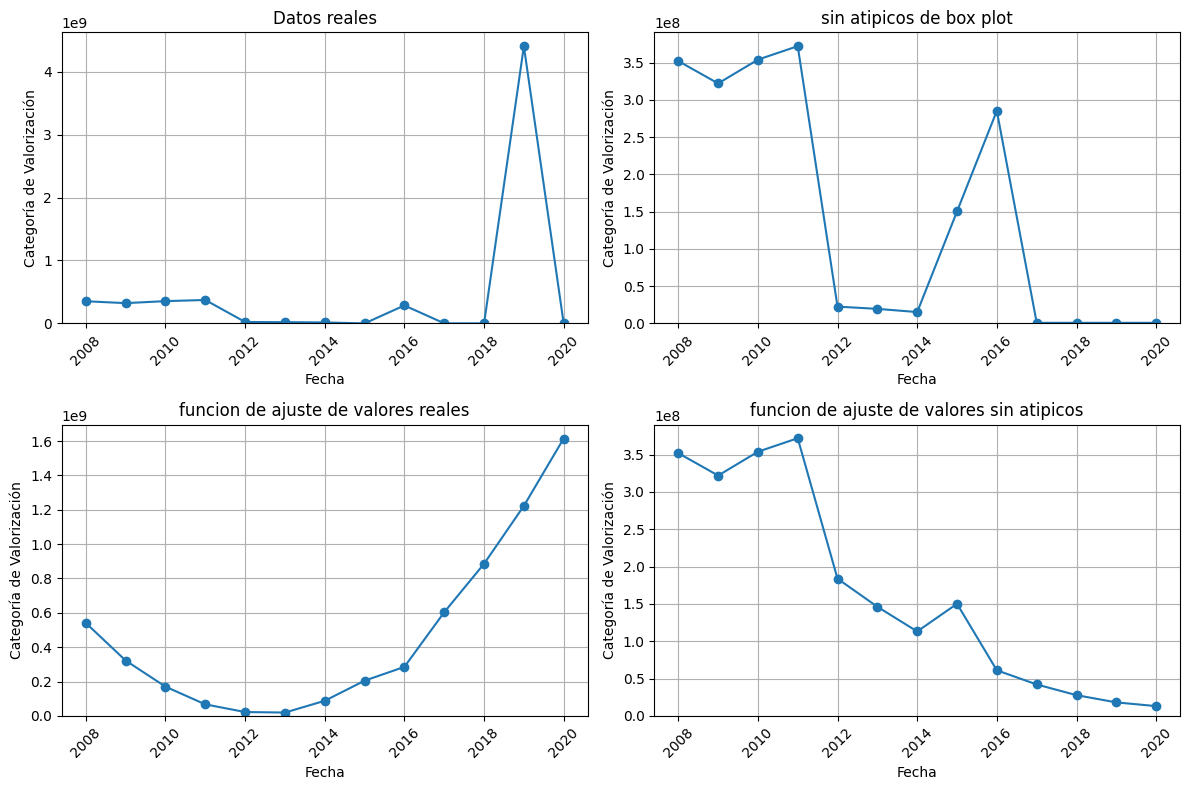

In [ ]:
#Ejemplo de metodo de ajuste de Atipicos
ejemplo=52250

# Crear la figura y los subplots
plt.figure(figsize=(12, 8))

#Datos reales----------------------------------------------------------------------------------------------------------------------------
df_predial=Predial_Final[Predial_Final['Municipio']==ejemplo]
df_predial=df_predial.fillna(0)

plt.subplot(2, 2, 1)
plt.plot(df_predial['Fecha'], df_predial['Predial'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('Datos reales')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)

#garfico sin atipicos de box plot----------------------------------------------------------------------------------------------------------------------------
df_predial=Predial_Final_sin_atipicos[Predial_Final_sin_atipicos['Municipio']==ejemplo]
df_predial=df_predial.fillna(0)

plt.subplot(2, 2, 2)
plt.plot(df_predial['Fecha'], df_predial['Predial'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('sin atipicos de box plot')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)
#grafico con funcion de ajuste de valores reales----------------------------------------------------------------------------------------------------------------------------
temp=Predial_Final[Predial_Final['Municipio']==ejemplo]
temp=temp.fillna(0)
#df_predial=ajustar_funcion(temp,'Fecha','Predial',funcion_polinomica,tolerancia_porcentaje=50)
funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             funcion_raiz_cuadrada, funcion_logistica]

df_predial=ajustar_funcion(temp,'Fecha','Predial',funciones,tolerancia_porcentaje=50)

plt.subplot(2, 2, 3)
plt.plot(df_predial['Fecha'], df_predial['Valores_Ajustados'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('funcion de ajuste de valores reales')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)


#grafico con funcion de ajuste de valores sin atipicos----------------------------------------------------------------------------------------------------------------------------
temp=Predial_Final_sin_atipicos[Predial_Final_sin_atipicos['Municipio']==ejemplo]
temp=temp.fillna(0)
#df_predial=ajustar_funcion(temp,'Fecha','Predial',funcion_polinomica,tolerancia_porcentaje=50)
funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             funcion_raiz_cuadrada, funcion_logistica]

df_predial=ajustar_funcion(temp,'Fecha','Predial',funciones,tolerancia_porcentaje=50)

plt.subplot(2, 2, 4)
plt.plot(df_predial['Fecha'], df_predial['Valores_Ajustados'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('funcion de ajuste de valores sin atipicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)
plt.tight_layout()
plt.show()

In [ ]:
#Impuesto predial por municipio (Clasificación: ok)
Cat_Clasificiacion=calcular_crecimiento_promedio_por_categoria_Predial(Predial_Transpuesto,2008,2010,2018,2020)
Cat_Clasificiacion=Cat_Clasificiacion.to_frame().reset_index()
Categorias_Predial=categorizar_por_boxplot(Cat_Clasificiacion,Cat_Clasificiacion['Predial'])

In [ ]:
#IPS por municipio (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1FnlTto45_Uf2kfgplRG3BIGO5cuwowpe'
IPS = pd.read_csv(archivo_csv, sep=';', encoding='latin-1')
IPS = IPS.fillna(0)

In [ ]:
#Información agricola por municipio (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1VPjkJTYKuUYzK6Gy5Lgf_oUKbLEjJ0ci'
Agricultura = pd.read_csv(archivo_csv, sep=';')
Agricultura = Agricultura.fillna(1)
lista_columnas = Agricultura[Agricultura.columns.difference(['Municipio','Year'])].columns.tolist()
Agricultura=calcular_crecimiento_promedio_por_categoria(Agricultura,lista_columnas,2008,2010,2018,2020)
Agricultura=limitar_atipicos(Agricultura, lista_columnas)
Agricultura=Agricultura.reset_index()

In [ ]:
# Dato de internet por municipio (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1_RlmOEByjtf5LZZLvijGvExy1UzpgqJt'
Internet = pd.read_csv(archivo_csv, sep=';', encoding='latin-1')
Internet=Internet[['COD_MUNICIPIO','Indice_internet_2020']]
Internet = Internet.fillna(0)

In [ ]:
#Seguridad por Municipio (Clasificación: ok)

archivo_csv = 'https://drive.google.com/uc?export=download&id=15rEU68edXPCII2V8m73tGph-B7b73nJs'
Seguridad_cat = pd.read_csv(archivo_csv, sep=',')
Seguridad_cat.fillna(1)
Seguridad_cat = Seguridad_cat.replace(to_replace=0, value=1)
columnas_like=['Seguridad_Abigeato_', 'Seguridad_Amenazas_', 'Seguridad_Delitos_Sexuales_', 'Seguridad_Extorsion_', 'Seguridad_homicidios_', 'Seguridad_T_Hurto_', 'Seguridad_hurto_a_comercio_',
 'Seguridad_T_homicidios_en_accidente_de_transito_', 'Seguridad_hurto_a_entidades_financieras_', 'Seguridad_hurto_a_residencias_', 'Seguridad_Hurto_Motocicleta_',
 'Seguridad_Lensiones_accidente_Transito_', 'Seguridad_lesiones_personales_', 'Seguridad_pirateria_terrestre_']


Seguridad_cat.rename(columns={'Id_Municipio_Dane': 'Codigo'}, inplace=True) #Cambio de nombre de columna
columna_puntual = Seguridad_cat['Codigo']
Seguridad_cat_2=pd.DataFrame(Seguridad_cat['Codigo'])

for columna in columnas_like:
    Fiscal_Temp=Seguridad_cat.filter(like=columna).copy()
    Fiscal_Temp['Codigo']=columna_puntual
    temp=pd.DataFrame(year_columnas(Fiscal_Temp, columna,'Codigo',2010,2012,2018,2020)['Industria'])
    Seguridad_cat_2[columna]=temp['Industria']
Seguridad_cat=Seguridad_cat_2
Seguridad_cat_2=[]

archivo_csv = 'https://drive.google.com/uc?export=download&id=148yrW8j8ePSXUqr8g39N_ghKYzx6DHhh'
Seguridad_total = pd.read_csv(archivo_csv, sep=',')

Seguridad_total.fillna(1)
Seguridad_total = Seguridad_total.replace(to_replace=0, value=1)
columnas_like=['Seguridad_']
Seguridad_total.rename(columns={'Id_Municipio_Dane': 'Codigo'}, inplace=True) #Cambio de nombre de columna
columna_puntual = Seguridad_total['Codigo']
Seguridad_total_2=pd.DataFrame(Seguridad_total['Codigo'])

for columna in columnas_like:
    Fiscal_Temp=Seguridad_total.filter(like=columna).copy()
    Fiscal_Temp['Codigo']=columna_puntual
    temp=pd.DataFrame(year_columnas(Fiscal_Temp, columna,'Codigo',2010,2012,2018,2020)['Industria'])
    Seguridad_total_2[columna]=temp['Industria']
Seguridad_total=Seguridad_total_2
Seguridad_total_2=[]

#archivo_csv = 'https://drive.google.com/uc?export=download&id=1h_UyaqBznDchxi6BREuR5SJYIZSdcsyZ'
#Seguridad_genero = pd.read_csv(archivo_csv, sep=',')

In [ ]:
#Turismo por municipio (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1Oi4u9yHS7lwDZhD2UhlR0eJHs1cChKgx'
Turismo= pd.read_csv(archivo_csv, sep=';', encoding='latin-1')
Turismo = Turismo.fillna(0)

In [ ]:
#Ingresos por Banca (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1DhjRoW8k3sYuD32Sj_yKsfUDPSUKDPYl'
Bancos= pd.read_csv(archivo_csv, sep=';',)
Bancos = eliminar_filas_nan(Bancos, 'Etiquetas de fila')
Bancos = cambiar_numeros_menores(Bancos, 100, 'Etiquetas de fila')
Bancos=year_columnas(Bancos, 'Bancos_','Etiquetas de fila',2008,2010,2018,2020)

In [ ]:
#Ingresos Industria y Comercio (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1fRK0My402q1VQkbZq62UOh1ssZTIIoH6'
Industria= pd.read_csv(archivo_csv, sep=';')
Industria = eliminar_filas_nan(Industria, 'Codigo')
Industria = cambiar_numeros_menores(Industria, 100, 'Codigo')
Industria=year_columnas(Industria, 'Industria_Comercio_','Codigo',2008,2010,2018,2020)

In [ ]:
#Desempeño_Fiscal (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=13ggqFSiTvguqmKx7IX6J3Ia6Q9ktM_Cn'
Fiscal= pd.read_csv(archivo_csv, sep=';')


columnas_like=['Fiscal_Autofinanciacion_','Fiscal_Dependencia_Nación_','Fiscal_Generación_Recursos_','Fiscal_Magnitud_Iinversión_','Fiscal_Capacidad_ahorro_','Fiscal_Indicador_desempeño_Fiscal_']
columna_puntual = Fiscal['Código']
Fiscal_2=pd.DataFrame(Fiscal['Código'])

for columna in columnas_like:
    Fiscal_Temp=Fiscal.filter(like=columna).copy()
    Fiscal_Temp['Código']=columna_puntual
    temp=pd.DataFrame(year_columnas(Fiscal_Temp, columna,'Código',2008,2010,2017,2018)['Industria'])
    Fiscal_2[columna]=temp['Industria']


In [ ]:
#Cerca_Ciudades (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1TDJYfmPvz1j9hR4fPUjKxQk-8j-yBtoV'
Ciudad= pd.read_csv(archivo_csv, sep=';')
columns_to_dummy=['Ciudad_Ley_617','Ciudad_Cerca_Ciudad','Ciudades_Capitales']
Ciudad=crear_dummies(Ciudad, columns_to_dummy)


In [ ]:
#Probreza (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1zKt6krij1NhTHzi7LyXweJtbqSSolxM2'
Pobreza_Total= pd.read_csv(archivo_csv, sep=';')
columnas_like=['Pobreza_Total_','Pobreza_Cabeceras_','Pobreza_Rural_']
columna_puntual = Pobreza_Total['Codigo']
Pobreza_Total_2=pd.DataFrame(Pobreza_Total['Codigo'])

for columna in columnas_like:
    Fiscal_Temp=Pobreza_Total.filter(like=columna).copy()
    Fiscal_Temp['Codigo']=columna_puntual
    temp=pd.DataFrame(year_columnas(Fiscal_Temp, columna,'Codigo',2008,2008,2018,2018)['Industria'])
    Pobreza_Total_2[columna]=temp['Industria']
Pobreza_Total=Pobreza_Total_2
Pobreza_Total_2=[]

archivo_csv = 'https://drive.google.com/uc?export=download&id=1FLBP6ZKATfgYRl_pBk7FzY4UjDe4WWqM'
Pobreza_Detalle= pd.read_csv(archivo_csv, sep=';')

columnas_like=['Probreza_Analfabetismo_', 'Probreza_Bajo logro educativo_', 'Probreza_Barreras a servicios para cuidado de la primera infancia_', 'Probreza_Barreras de acceso a servicios de salud_',
 'Probreza_Tasa de dependecia económica_', 'Probreza_Hacinamiento crítico_', 'Probreza_Inadecuada eliminación de excretas_', 'Probreza_Inasistencia escolar_', 'Probreza_Material inadecuado de paredes exteriores_', 'Probreza_Material inadecuado de pisos_', 'Probreza_Rezago escolar_', 'Probreza_Sin acceso a fuente de agua mejorada_', 'Probreza_Sin aseguramiento en salud_', 'Probreza_Trabajo infantil_', 'Probreza_Trabajo informal_']

columna_puntual = Pobreza_Detalle['Codigo']
Pobreza_Detalle_2=pd.DataFrame(Pobreza_Detalle['Codigo'])

for columna in columnas_like:
    Fiscal_Temp=Pobreza_Detalle.filter(like=columna).copy()
    Fiscal_Temp['Codigo']=columna_puntual
    temp=pd.DataFrame(year_columnas(Fiscal_Temp, columna,'Codigo',2008,2008,2018,2018)['Industria'])
    Pobreza_Detalle_2[columna]=temp['Industria']
Pobreza_Detalle=Pobreza_Detalle_2
Pobreza_Detalle_2=[]

In [ ]:
#Educacion (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=1kyeKQcaFKBzf9OSxaD9LQ2AMbOZz17f9'
Educacion= pd.read_csv(archivo_csv, sep=';')


In [ ]:
#Automotores (Clasificación: ok) ingreso por pago de autos
archivo_csv = 'https://drive.google.com/uc?export=download&id=1tdw20Uh2QQKETgWzGBwu9vygsxn3zaMT'
Autos= pd.read_csv(archivo_csv, sep=';',)
Autos = eliminar_filas_nan(Autos, 'Codigo')
Autos = cambiar_numeros_menores(Autos, 100, 'Codigo')
Autos=year_columnas(Autos, 'Autos_','Codigo',2008,2010,2018,2020)


In [ ]:
#Descripcion_Predios (Clasificación: ok)
archivo_csv = 'https://drive.google.com/uc?export=download&id=17SX1r3FRC0C7Zsl8AyEm7RQ0zZ2UTIJa'
Lotes= pd.read_csv(archivo_csv, sep=',',)
Lotes = Lotes.fillna(0)

In [ ]:
#Terridata  (Clasificación: ok)

##Proceso se corrió y por tiempo de ejecución se cargó procesamiento de el dive
#archivo_csv = 'https://drive.google.com/uc?export=download&id=1_OA8ZG4ct75lERCJ19pEZ6BMWkR5yhiT'
#Terridata_Class= pd.read_csv(archivo_csv, sep=',',)
#Terridata_Class=Terridata_Class.replace(0, np.nan)
#columnas_a_eliminar = Terridata_Class.columns[Terridata_Class.isna().all()]
#Terridata_Class= Terridata_Class.drop(columnas_a_eliminar, axis=1)

#completa datos por interpolación, se demora 14 minutos en correr
#Terridata_Class=completar_datos_serie_tiempo(Terridata_Class,2008,2020)


#ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Terridata_Class_interpolada.csv'
#Terridata_Class.to_csv(ruta_archivo, index=False)


archivo_csv = 'https://drive.google.com/uc?export=download&id=1z-XajNX0Ia_BvcTT4hL3R39ySUCW7rTQ'
Terridata_Class= pd.read_csv(archivo_csv, sep=',',)

lista_columnas = [col for col in Terridata_Class.columns.tolist() if col not in ['Year', 'Category']]
Terridata_Class.rename(columns={'Category': 'Municipio'}, inplace=True)
Terridata_Class=calcular_crecimiento_promedio_por_categoria(Terridata_Class, lista_columnas, 2008, 2010, 2018, 2020)

columnas_a_eliminar = Terridata_Class.columns[Terridata_Class.isna().all()]
Terridata_Class= Terridata_Class.drop(columnas_a_eliminar, axis=1)
Terridata_Class= Terridata_Class.fillna(0)

Terridata_Class = Terridata_Class.drop('Municipio', axis=1)
Terridata_Class = Terridata_Class.reset_index()


In [ ]:
#Terridata para ser utilizada en seleccion de variables
archivo_csv = 'https://drive.google.com/uc?export=download&id=1_OA8ZG4ct75lERCJ19pEZ6BMWkR5yhiT'
Terridata_var= pd.read_csv(archivo_csv, sep=',',)
Terridata_var=Terridata_var.loc[(Terridata_var['Year'] > 2017) & (Terridata_var['Year'] < 2020)]
Terridata_var=Terridata_var.drop('Year', axis=1)
Terridata_var=Terridata_var.groupby('Category').mean()
Terridata_var['Poblacion_TotalHogares'] = Terridata_var['Poblacion_TotalHogares'].replace(0, 118)
Terridata_var=Terridata_var.reset_index()

In [ ]:
Cat_Clasificiacion.rename(columns={'CODIGO_DANE': 'Id_Municipio_Dane'}, inplace=True)
IPS.rename(columns={'ID_Municipio': 'Id_Municipio_Dane'}, inplace=True)
Agricultura.rename(columns={'index': 'Id_Municipio_Dane'}, inplace=True)
Internet.rename(columns={'COD_MUNICIPIO': 'Id_Municipio_Dane'}, inplace=True)
Seguridad_cat.rename(columns={'Codigo': 'Id_Municipio_Dane'}, inplace=True)
Seguridad_total.rename(columns={'Codigo': 'Id_Municipio_Dane'}, inplace=True)
Turismo.rename(columns={'id_dane_municipio': 'Id_Municipio_Dane'}, inplace=True)
Bancos.rename(columns={'Municipio': 'Id_Municipio_Dane'}, inplace=True)
Industria.rename(columns={'Municipio': 'Id_Municipio_Dane'}, inplace=True)
Fiscal_2.rename(columns={'Código': 'Id_Municipio_Dane'}, inplace=True)
Ciudad.rename(columns={'Código': 'Id_Municipio_Dane'}, inplace=True)
Pobreza_Total.rename(columns={'Codigo': 'Id_Municipio_Dane'}, inplace=True)
Pobreza_Detalle.rename(columns={'Codigo': 'Id_Municipio_Dane'}, inplace=True)
Educacion.rename(columns={'Codigo': 'Id_Municipio_Dane'}, inplace=True)
Autos.rename(columns={'Municipio': 'Id_Municipio_Dane'}, inplace=True)
Lotes.rename(columns={'Id_Municipio_Dane': 'Id_Municipio_Dane'}, inplace=True)
Terridata_Class.rename(columns={'index': 'Id_Municipio_Dane'}, inplace=True)
Terridata_var.rename(columns={'Category': 'Id_Municipio_Dane'}, inplace=True)

#4 Cargar Datos Regresión

In [ ]:
#quita atipicos con boxplot, se oculta, porque toma 3 horas de porcesamiento


#archivo_csv = 'https://drive.google.com/uc?export=download&id=1z-XajNX0Ia_BvcTT4hL3R39ySUCW7rTQ'
#Terridata_Reg= pd.read_csv(archivo_csv, sep=',',)
#Terridata_Reg['Fecha']=pd.to_datetime(Terridata_Reg['Year'], format='%Y')
#Columnas_to_delete=columnas_con_20_por_ciento_ceros_o_nan(Terridata_Reg)
#Terridata_Reg=Terridata_Reg.drop(Columnas_to_delete, axis=1)

#columnas_para_normalizar=Terridata_Reg_sin_atipicos.columns
#columnas_para_normalizar = columnas_para_normalizar.drop('Year')
#columnas_para_normalizar= columnas_para_normalizar.drop('Municipio')
#columnas_para_normalizar= columnas_para_normalizar.drop('Fecha')

#Terridata_Reg_sin_atipicos=Terridata_Reg
#for Variable_Reg in columnas_para_normalizar:
  #Terridata_Reg_sin_atipicos=normalizar_serie_tiempo_por_categoria(Terridata_Reg_sin_atipicos, 'Fecha', 'Municipio', Variable_Reg)
  #Terridata_Reg_sin_atipicos[Variable_Reg] = Terridata_Reg_sin_atipicos[Variable_Reg].replace(0, np.nan)
  #print(Variable_Reg)

#ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Terridata_sin_atipicos.csv'
#Terridata_Reg_sin_atipicos.to_csv(ruta_archivo, index=False)

In [ ]:
##Se oculta porque demora 3 horas ajustando info a distribuciones

#archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Terridata_sin_atipicos.csv'
#Terridata_Reg_sin_atipicos= pd.read_csv(archivo_csv, sep=',',)

#Generar los ajustes de la variables de valroes sin atipicos. el rpoceso dura 2 horar corriendo

#import warnings
#warnings.filterwarnings("ignore")

#columnas_para_normalizar=Terridata_Reg_sin_atipicos.columns
#columnas_para_normalizar=columnas_para_normalizar.drop('Year')
#columnas_para_normalizar= columnas_para_normalizar.drop('Municipio')
#columnas_para_normalizar= columnas_para_normalizar.drop('Fecha')

#Terridata_Reg_sin_atipicos['Fecha'] = pd.to_datetime(Terridata_Reg_sin_atipicos['Fecha'])
##funcion de ajuste de valores sin atipicos----------------------------------------------------------------------------------------------------------------------------
#funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             #funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             #funcion_raiz_cuadrada, funcion_logistica]
#df_predial=Terridata_Reg_sin_atipicos
#df_predial=df_predial.fillna(0)

#for Variable_Reg in columnas_para_normalizar:
  #print(Variable_Reg)
  #x=ajustar_funcion2(df_predial,'Fecha',Variable_Reg,'Municipio',funciones,tolerancia_porcentaje=50)
  #df_predial[Variable_Reg]=x['Valores_Ajustados']
  #df_predial.drop(columns=[Variable_Reg,'Anio','Fecha'], inplace=True)
  #df_predial.rename(columns={'Valores_Ajustados': Variable_Reg,'Municipio': 'CODIGO_DANE','Year':'Año'}, inplace=True)
  #df_predial=reemplazar_valores_negativos(df_predial, 'Municipio', Variable_Reg)

#ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Terridata_ajuste_funcion.csv'
#df_predial.to_csv(ruta_archivo, index=False)


In [ ]:
#Archivo input de terridata procesada
archivo_csv = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Terridata_ajuste_funcion.csv'
df_Terridata = pd.read_csv(archivo_csv)
df_Terridata=df_Terridata.drop('Fecha', axis=1)
df_Terridata=df_Terridata.abs()

In [ ]:

# valor absoluto normalizado
Predial_Y=comparacion_con_anio_base(Predial_Transpuesto, 'CODIGO_DANE', 'Predial', 'Año',2008)
Predial_Y=Predial_Y[['CODIGO_DANE','Año','Predial_(2009-2008)/2008']]
Predial_Y.rename(columns={'CODIGO_DANE': 'Municipio','Año': 'Year','Predial_(2009-2008)/2008': 'Crecimiento'}, inplace=True)
Predial_Y=agregar_valores_anteriores(Predial_Y,'Municipio', 'Crecimiento', anios_anteriores=3)
Predial_Y.rename(columns={'Crecimiento': 'Crecimiento_anterior_0'}, inplace=True)

#Calculo de variable objetivo
Predial_Y=agregar_valores_futuros(Predial_Y,'Municipio', 'Crecimiento_anterior_0', 3)
Predial_Y=Predial_Y[['Municipio','Year','Crecimiento_anterior_0','Crecimiento_anterior_1','Crecimiento_anterior_2','Crecimiento_anterior_3','Crecimiento_anterior_0_futuro_3']]
Predial_Y.rename(columns={'Crecimiento_anterior_0_futuro_3': 'Crecimiento'}, inplace=True)


<ipython-input-4-8db98f54e89b>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-4-8db98f54e89b>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


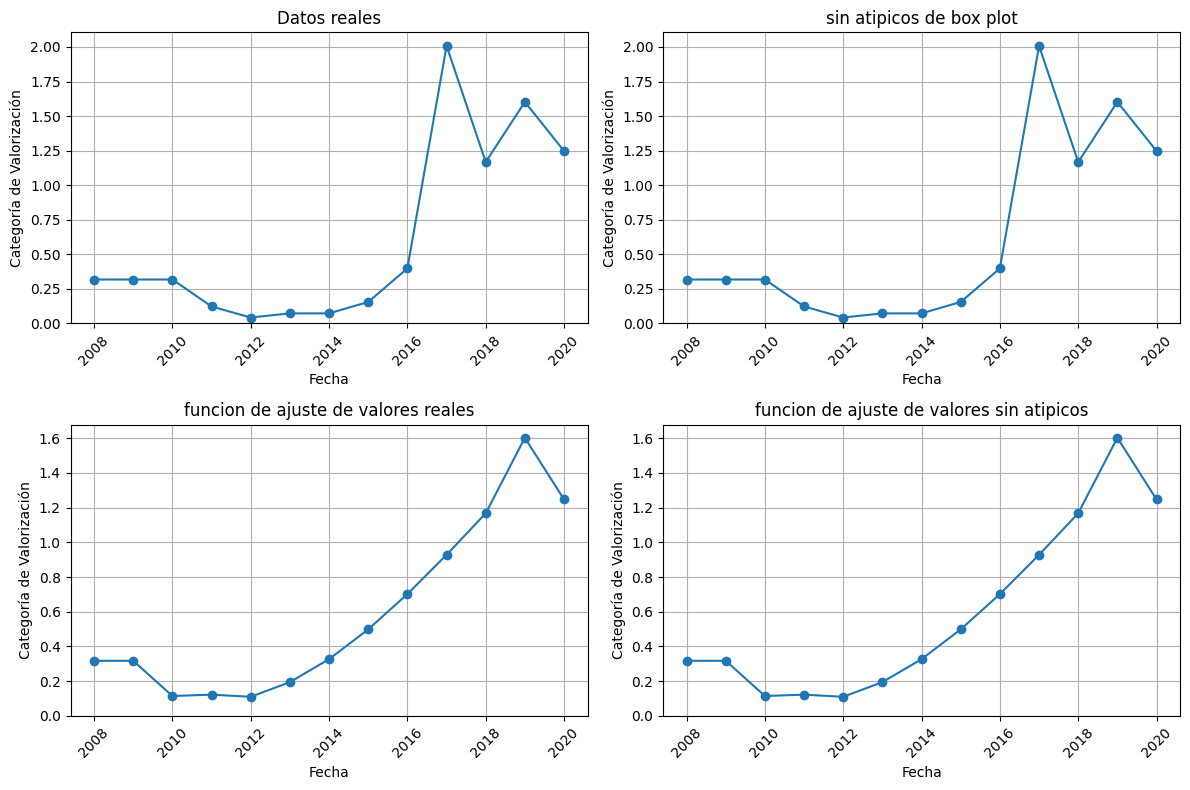

In [ ]:
#Ejemplo de metodo de ajuste de Atipicos
ejemplo=99000
Variable_Reg='vivienda_servicios_publicos_PenetracionBandaAncha'
Test=Terridata_Reg[['Fecha','Municipio',Variable_Reg]]

#quita atipicos con boxplot
Test_sin_atipicos=normalizar_serie_tiempo_por_categoria(Test, 'Fecha', 'Municipio', Variable_Reg)
Test_sin_atipicos[Variable_Reg] = Test_sin_atipicos[Variable_Reg].replace(0, np.nan)

# Crear la figura y los subplots
plt.figure(figsize=(12, 8))

#Datos reales----------------------------------------------------------------------------------------------------------------------------
df_predial=Test[Test['Municipio']==ejemplo]
df_predial=df_predial.fillna(0)

plt.subplot(2, 2, 1)
plt.plot(df_predial['Fecha'], df_predial[Variable_Reg], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('Datos reales')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)

#garfico sin atipicos de box plot----------------------------------------------------------------------------------------------------------------------------
df_predial=Test_sin_atipicos[Test_sin_atipicos['Municipio']==ejemplo]
df_predial=df_predial.fillna(0)

plt.subplot(2, 2, 2)
plt.plot(df_predial['Fecha'], df_predial[Variable_Reg], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('sin atipicos de box plot')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)
#grafico con funcion de ajuste de valores reales----------------------------------------------------------------------------------------------------------------------------
temp=Test[Test['Municipio']==ejemplo]
temp=temp.fillna(0)
#df_predial=ajustar_funcion(temp,'Fecha','Predial',funcion_polinomica,tolerancia_porcentaje=50)
funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             funcion_raiz_cuadrada, funcion_logistica]

df_predial=ajustar_funcion(temp,'Fecha',Variable_Reg,funciones,tolerancia_porcentaje=50)

plt.subplot(2, 2, 3)
plt.plot(df_predial['Fecha'], df_predial['Valores_Ajustados'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('funcion de ajuste de valores reales')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)


#grafico con funcion de ajuste de valores sin atipicos----------------------------------------------------------------------------------------------------------------------------
temp=Test_sin_atipicos[Test_sin_atipicos['Municipio']==ejemplo]
temp=temp.fillna(0)
#df_predial=ajustar_funcion(temp,'Fecha','Predial',funcion_polinomica,tolerancia_porcentaje=50)
funciones = [funcion_lineal, funcion_exponencial, funcion_polinomica, funcion_logaritmica,
             funcion_coseno, funcion_seno, funcion_cuadratica, funcion_cubica,
             funcion_raiz_cuadrada, funcion_logistica]

df_predial=ajustar_funcion(temp,'Fecha',Variable_Reg,funciones,tolerancia_porcentaje=50)

plt.subplot(2, 2, 4)
plt.plot(df_predial['Fecha'], df_predial['Valores_Ajustados'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Categoría de Valorización')
plt.title('funcion de ajuste de valores sin atipicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)
plt.tight_layout()
plt.show()

para trabajar en regresión
1. info agricola
2. seguridad
3. Bancos
4. industria
5. desempeño_fiscal
6. cerca a ciudaes
7. Educación
8.  Autos

# 5 Creación Base 0 Clasificación

### 5.1. Unir data frames de categorización

In [ ]:
#Quitar tildes de nomblre de municio
Municipios['Nombre_Municipio'] = Municipios['Nombre_Municipio'].apply(quitar_tildes)

In [ ]:
#Base para seleccion devariables_de la etapa final
df_unido=Municipios.merge(IPS, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Agricultura, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Internet, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Seguridad_cat, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Seguridad_total, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Turismo, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Bancos, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Industria, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Fiscal_2, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Ciudad, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Pobreza_Total, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Pobreza_Detalle, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Educacion, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Autos, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Lotes, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Terridata_var, on='Id_Municipio_Dane', how='left')

ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Base_0_Variables.csv'
df_unido.to_csv(ruta_archivo, index=False)

In [ ]:
#Unir data sets Id_Municipio_Dane CODIGO_DANE

df_unido=Municipios.merge(Cat_Clasificiacion, on='Id_Municipio_Dane', how='inner')
df_unido=df_unido.merge(IPS, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Agricultura, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Internet, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Seguridad_cat, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Seguridad_total, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Turismo, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Bancos, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Industria, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Fiscal_2, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Ciudad, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Pobreza_Total, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Pobreza_Detalle, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Educacion, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Autos, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Lotes, on='Id_Municipio_Dane', how='left')
df_unido=df_unido.merge(Terridata_Class, on='Id_Municipio_Dane', how='left')
#df_unido = df_unido.fillna(0)

In [ ]:
#Borrar columans con solo Nan (1979 columnas)
columnas_a_eliminar = df_unido.columns[df_unido.isna().all()]
df_unido= df_unido.drop(columnas_a_eliminar, axis=1)
df_unido = df_unido.fillna(0)

In [ ]:
#Columans que componen el calculo del impuesto predial
columnas_a_eliminar =[
'OT_Avaluo_catastral_total',
'OT_Avaluo_catastral_urbano',
'OT_Avaluo_catastral_rural',
'OT_Recaudo_efectivo_predial',
'OT_Total_predios',
'Industria_x',
'Industria_y',
]
df_unido= df_unido.drop(columnas_a_eliminar, axis=1)

In [ ]:
non_numeric_variables = df_unido .select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_variables

['Nombre_Municipio', 'Nombre_Departamento', 'recomendacion']

###5.2. Normzalizar Varibles

In [ ]:
# Normalizar variables
lista_cat=['Id_Municipio_Dane','Nombre_Municipio','Id_Departamento_Dane','Nombre_Departamento','Predial','recomendacion']
Categorias=df_unido [lista_cat]
Normalizar=df_unido.drop(lista_cat, axis=1)
df_unido_Normalizada=normalize_variables(Normalizar)
df_unido_Normalizada=Categorias.join(df_unido_Normalizada)

In [ ]:
columnas_df1 = df_unido_Normalizada.columns.tolist()
columnas_df1=pd.DataFrame(columnas_df1)
#columnas_df1

In [ ]:
df_unido_Normalizada_class=df_unido_Normalizada

In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_class.csv'
df_unido_Normalizada_class.to_csv(ruta_archivo, index=False)

###5.3. Reducir variables con alta correlación

In [ ]:
###Analisis de las variables con alta correlación para convertir en componentes principales

#Genera lista con las variables correlacionadas por grupos
lista_cat=['Id_Municipio_Dane','Nombre_Municipio','Id_Departamento_Dane','Nombre_Departamento','Predial','recomendacion']
df_unido_corr=df_unido_Normalizada.drop(lista_cat, axis=1)
grupos_variables=obtener_variables_correlacionadas(df_unido_corr,0.8)
# Contar las categorías
conteo_categorias = grupos_variables['Grupo'].value_counts()

# Filtrar las categorías con más de un registro
categorias_mas_de_un_registro = conteo_categorias[conteo_categorias > 1]
categorias_mas_de_un_registro=pd.DataFrame(categorias_mas_de_un_registro)
categorias_mas_de_un_registro=categorias_mas_de_un_registro.reset_index()
categorias_mas_de_un_registro=pd.DataFrame(categorias_mas_de_un_registro['index'])
Variables_Correlacion = grupos_variables.merge(categorias_mas_de_un_registro, left_on='Grupo',right_on='index', how='inner')

# seleccioan de la base _0 las variables que presentaron correlación

columnas_seleccionadas = Variables_Correlacion['Variable'].tolist() # Obtener lista de columnas a seleccionar

# Seleccionar columnas en df1 basado en la lista de columnas_seleccionadas
df_seleccionado = df_unido_Normalizada[columnas_seleccionadas]

#Generación de los componentes principales
componentes_p=generar_componentes_principales(df_seleccionado, Variables_Correlacion)

#Borrar columnas corrlacionadas y agregar componentes principales
df_unido_Normalizada_sin_corr=df_unido_Normalizada.drop(columnas_seleccionadas, axis=1)
df_unido_Normalizada_sin_corr=pd.concat([df_unido_Normalizada_sin_corr, componentes_p], axis=1)

In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/df_unido_Normalizada_sin_corr.csv'
df_unido_Normalizada_sin_corr.to_csv(ruta_archivo, index=False)

# 6 Creacion Base 0 Regresión

### 6.1. Integracion de bases de datos

In [ ]:
Base_0_reg=df_Terridata.merge(Municipios['Id_Municipio_Dane'],left_on='Municipio',right_on='Id_Municipio_Dane',how='inner')
columnas_a_eliminar = ['Id_Municipio_Dane']
Base_0_reg=Base_0_reg.drop(columnas_a_eliminar, axis=1)

###6.2. completar faltantes y eliminar columas 0

In [ ]:
valores_faltantes = Base_0_reg.isna().sum()
valores_faltantes = valores_faltantes[valores_faltantes != 0]
valores_faltantes=pd.DataFrame(valores_faltantes)
valores_faltantes.shape[0]

9

In [ ]:
columnas_con_solo_na = Base_0_reg.columns[Base_0_reg.isna().all()]
Base_0_reg = Base_0_reg.drop(columnas_con_solo_na , axis=1)
Base_0_reg = Base_0_reg.fillna(0)

In [ ]:
#Elimina columans que sumen 0
sums = Base_0_reg.sum()  # Obtiene la suma de cada columna
zero_sum_columns = sums[sums == 0].index  # Filtra las columnas con suma igual a cero
Base_0_reg=Base_0_reg.drop(zero_sum_columns, axis=1)

###6.3 Variables calculadas

In [ ]:
Base_0_reg=Base_0_reg.merge(Predial_Y,on=['Municipio','Year'],how= "left", suffixes=('', '_Predial_Y'))
Base_0_reg['Entranamiento'] = Base_0_reg['Crecimiento'].apply(lambda x: 'predicción' if pd.isnull(x) else 'entrenamiento')


In [ ]:
non_numeric_variables = Base_0_reg.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_variables

['Entranamiento']

###6.4 Normalizar variables

In [ ]:
# Normalizar variables
lista_cat=['Year', 'Municipio','Entranamiento','Crecimiento','Crecimiento_anterior_0','Crecimiento_anterior_1','Crecimiento_anterior_2','Crecimiento_anterior_3']
Categorias=Base_0_reg[lista_cat]
Normalizar=Base_0_reg.drop(lista_cat, axis=1)
Normalizar=identificar_y_reemplazar_atipicos_superiores(Normalizar)
Base_0_Normalizada=normalize_variables_limpieza(Normalizar)
Base_0_Normalizada=Categorias.join(Base_0_Normalizada)
Base_0_Normalizada=Base_0_Normalizada.fillna(0)
#Base_0_Normalizada


###6.5 Simplificacion de variables con correlación alta

In [ ]:
###Analisis de las variables con alta correlación para convertir en componentes principales

#Genera lista con las variables correlacionadas por grupos
lista_cat=['Year', 'Municipio','Entranamiento','Entranamiento','Crecimiento','Crecimiento_anterior_0','Crecimiento_anterior_1','Crecimiento_anterior_2','Crecimiento_anterior_3']
base_0_corr=Base_0_Normalizada.drop(lista_cat, axis=1)
grupos_variables=obtener_variables_correlacionadas(base_0_corr,0.8)
# Contar las categorías
conteo_categorias = grupos_variables['Grupo'].value_counts()

# Filtrar las categorías con más de un registro
categorias_mas_de_un_registro = conteo_categorias[conteo_categorias > 1]
categorias_mas_de_un_registro=pd.DataFrame(categorias_mas_de_un_registro)
categorias_mas_de_un_registro=categorias_mas_de_un_registro.reset_index()
categorias_mas_de_un_registro=pd.DataFrame(categorias_mas_de_un_registro['index'])
Variables_Correlacion = grupos_variables.merge(categorias_mas_de_un_registro, left_on='Grupo',right_on='index', how='inner')

# seleccioan de la base _0 las variables que presentaron correlación

columnas_seleccionadas = Variables_Correlacion['Variable'].tolist() # Obtener lista de columnas a seleccionar

# Seleccionar columnas en df1 basado en la lista de columnas_seleccionadas
df_seleccionado = Base_0_Normalizada[columnas_seleccionadas]

#Generación de los componentes principales
componentes_p=generar_componentes_principales(df_seleccionado, Variables_Correlacion)

#Borrar columnas corrlacionadas y agregar componentes principales
Base_0_Normalizada_sin_corr=Base_0_Normalizada.drop(columnas_seleccionadas, axis=1)
Base_0_Normalizada_sin_corr=pd.concat([Base_0_Normalizada_sin_corr, componentes_p], axis=1)


In [ ]:
Base_0_Normalizada_sin_corr.head()

,Year,Municipio,Entranamiento,Crecimiento,Crecimiento_anterior_0,Crecimiento_anterior_1,Crecimiento_anterior_2,Crecimiento_anterior_3,Ambiente_area_amenazada,Ambiente_area_deforestada,...,Componente_Principal_221,Componente_Principal_220,Componente_Principal_230,Componente_Principal_238,Componente_Principal_239,Componente_Principal_253,Componente_Principal_255,Componente_Principal_265,Componente_Principal_279,Componente_Principal_281
0,2008,5001,entrenamiento,0.405770,0.000000,0.00000,0.00000,0.0,0.403308,1.000000,...,-0.468771,-0.504845,-0.063567,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
1,2009,5001,entrenamiento,0.287074,0.000000,0.00000,0.00000,0.0,0.403308,1.000000,...,-0.468771,-0.504845,-0.083080,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
2,2010,5001,entrenamiento,0.566290,0.236050,0.00000,0.00000,0.0,0.403308,1.000000,...,-0.468771,-0.504845,-0.129946,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
3,2011,5001,entrenamiento,0.895454,0.405770,0.23605,0.00000,0.0,0.403308,1.000000,...,-0.468771,-0.504845,-0.114762,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073
4,2012,5001,entrenamiento,1.049164,0.287074,0.40577,0.23605,0.0,0.403308,0.579779,...,-0.468771,-0.504845,-0.132545,-0.168923,-0.19027,0.043402,0.922984,1.208225,-0.633297,-0.489073


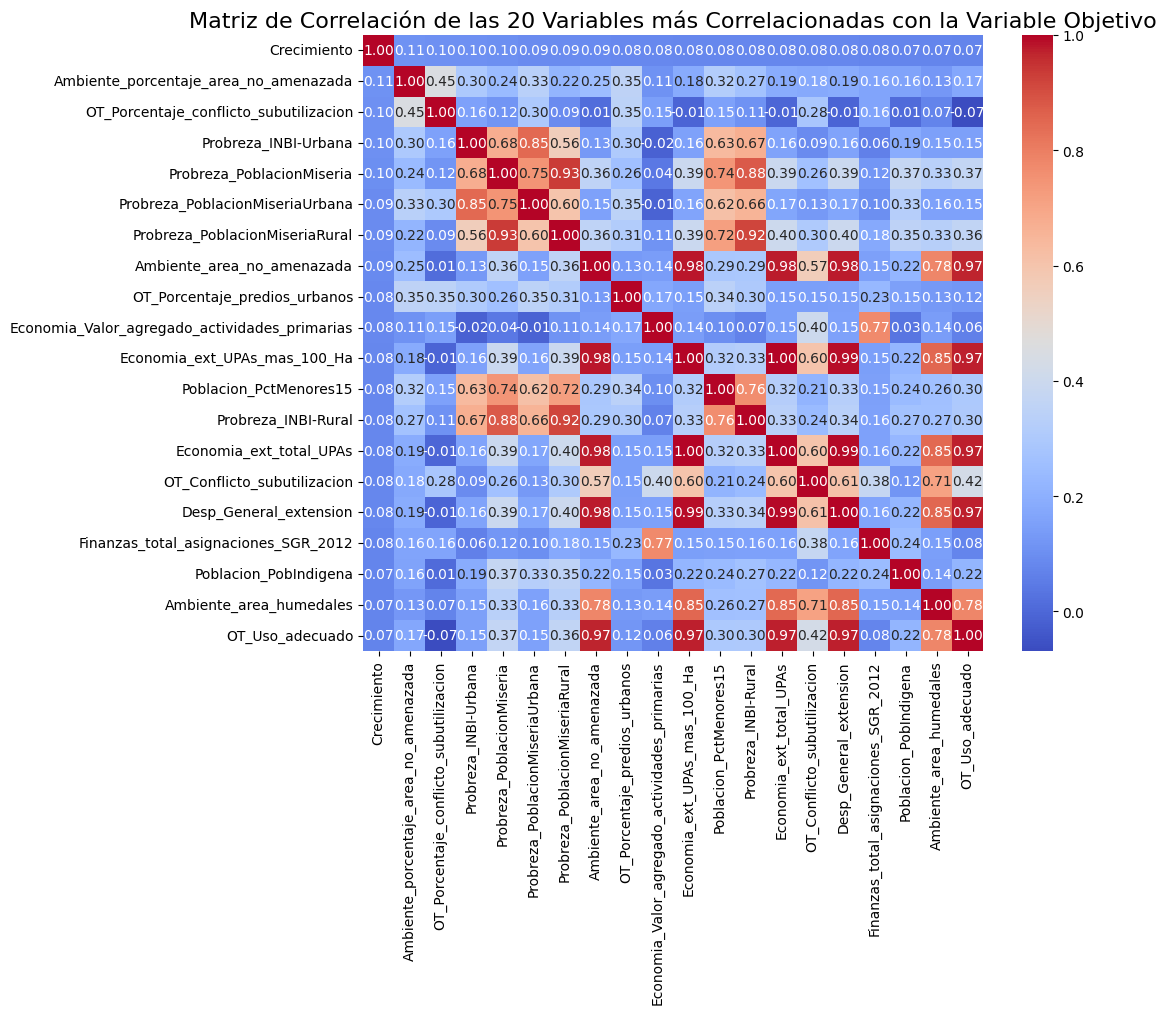

In [ ]:
# Grafico de correlaciones
# Calcula la matriz de correlación

lista_cat=['Year', 'Municipio','Entranamiento','Crecimiento_anterior_0','Crecimiento_anterior_1','Crecimiento_anterior_2','Crecimiento_anterior_3']
Corr_grafico=Base_0_reg.drop(lista_cat, axis=1)

correlation_matrix = Corr_grafico.corr()

# Selecciona las N variables con las correlaciones más altas con la variable objetivo
N = 20
top_correlations = correlation_matrix.nlargest(N, 'Crecimiento')['Crecimiento']

# Genera el gráfico de calor para visualizar las correlaciones seleccionadas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[top_correlations.index, top_correlations.index], annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Matriz de Correlación de las {N} Variables más Correlacionadas con la Variable Objetivo", fontsize=16)
plt.show()

In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Base_0_Normalizada_regresion.csv'
Base_0_Normalizada_sin_corr.to_csv(ruta_archivo, index=False)

In [ ]:
ruta_archivo = '/content/drive/My Drive/4_Proyect_Final/1_Datos/Base_0_Normalizada_regresion_solo_crecimiento.csv'
Categorias.to_csv(ruta_archivo, index=False)